<a href="https://colab.research.google.com/github/Adzawla/COVID-19/blob/master/ADZAWLA_PROJET_DATA_SCIENCEv0f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><div align="center"><b> PROJET DE DATA SCIENCE</b></div></h1>

<u>PRESENTE PAR</u> :

**KUDZO VENUNYE ADZAWLA**

**INTRODUCTION**

<p align="justify"> Le présent travail constitue une proposition de réponse au projet de data science auquel sont soumis les Etudiants du Master 2, Modelisation Statistqiue et Informatique.  En effet, le long de ce projet, nous comptons apporter des solutions aux différentes questions liées aux algorithmes de Machine Learning et du Deep Learning.</p>

**1- DONNEES**

<p>Le jeu de données utilisé dans ce projet est issu de Kaggle, une platforme dédiée à l'apprentissage et aux compétitions en data science. Il est téléchargeable à l'adresse suivante:</p>

https://www.kaggle.com/schalamalasetty/wine-quality-data-clustering?select=winequality.csv

##**2-PREPROCESSING**

#### **2.1-CONTEXTE DES DONNEES ET PROBLEMATIQUE POSEE**

<p align="justify">Le jeu de données que nous utilisons dans ce projet porte sur les variantes rouge et blanche du vin portugais "Vinho Verde". Pour des raisons de confidentialité et de logistique, seules les variables physico-chimiques (les entrées) et sensorielles (les sorties) sont disponibles (par exemple, il n'y a pas de données sur les types de raisins, la marque de vin, le prix de vente du vin, etc.) <p>
Pour plus de détails, consultez : http://www.vinhoverde.pt/en/ ou la référence [Cortez et al., 2009].  

<p align="justify">Le travail qui nous incombe de faire consiste à se servir du jeu de données et implémenter les méthodes de clustering, de regression, et de classification tel que requis par les consgnes du projets.</p>
<p align="justify">Avant d'évoluer, il serait raisonnable de prendre connaissance des différentes variables ainsi que leurs significations.</p>

#### **2.2-DESCRIPTION DES DONNEES**

|**Variables**        |      **description**                       |
|-----------------|----------------------------------------|
|CustomerID       | Numero d'identification de l'observation|
|Fixed acidity    | la plupart des acides impliqués dans le vin sont fixes ou non volatils (ne s'évaporent pas facilement)|
|Volatile acidity |la quantité d'acide acétique dans le vin, qui, à des niveaux trop élevés, peut entraîner un goût de vinaigre désagréable|
|Citric acid       | trouvé en petites quantités, l'acide citrique peut ajouter de la "fraîcheur" et de la saveur aux vins|
|Residual sugar       | la quantité de sucre restant après l'arrêt de la fermentation, il est rare de trouver des vins de moins de 1 gramme/litre et les vins de plus de 45 grammes/litre sont considérés comme doux|
|Chlorides      | la quantité de sel dans le vin|
|Free sulfur dioxide | la forme libre du SO2 existe en équilibre entre le SO2 moléculaire (sous forme de gaz dissous) et l'ion bisulfite ; elle empêche la croissance microbienne et l'oxydation du vin|
|Total sulfur dioxide | quantité de formes libres et liées de S02 ; à faible concentration, le SO2 est généralement indétectable dans le vin, mais à des concentrations de SO2 libre supérieures à 50 ppm, le SO2 devient évident dans le nez et le goût du vin|
|Density  | la densité de l'eau est proche de celle de l'eau en fonction du pourcentage d'alcool et de la teneur en sucre|
|PH       | décrit le degré d'acidité ou de basicité d'un vin sur une échelle allant de 0 (très acide) à 14 (très basique) ; la plupart des vins se situent entre 3 et 4 sur l'échelle du pH|
|Sulphates       |un additif pour le vin qui peut contribuer au taux de dioxyde de soufre gazeux (S02), qui agit comme un antimicrobien et un antioxydant|
|Alcool       | le pourcentage d'alcool contenu dans le vin|
|quality       | variable de sortie (basée sur des données sensorielles, score entre 0 et 10)|
|Good       | qualité du vin (qu'il soit bon ou non)|
|Couleur       | couleur du vin (rouge ou blanc)|


NB: La variable ou l'attibut cible dans notre cas d'espèce est la variable **quality**.

#### **2.3-MANIPULATION ET PRE-TRAITEMENT DES DONNEES**

<p align="justify"> Nous croyons que les languages R et Python sont deux outils puissants et complémentaires de traitement, d'analyse et de modelisation de données. Plutôt que de vouloir établir des liens hiérarchiques, nous pensons qu'il faut plutôt les utiliser simultanément afin de tirer le meilleur et jouir de la puissance des deux. Ceci étant, nous allons faire un usage simultané des deux APIs dans le cadre de projet, ceci grâce au package rpy2, une extension de python.</p>

In [2]:
# Activons le package rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages("devtools")

library(devtools)

install_github("vqv/ggbiplot")

library(ggbiplot)

In [1]:
# Chargement des librairies à utiliser dans ce projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

######**Mise en place du répertoire de travail, importation et aperçu du jeu de données**

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/MSI_DATA_SCIENCE_PROJECT'

df = pd.read_csv("/content/winequality.csv")

<p align="justify">En plus des données du jeu de données, nous créons une variable supllémentaire pour regrouper en trois classes les individus.</p>

<ol> 
<li> [0-4[ = 1 (vin de qualité inférieure)</li>
<li> [4-6] = 2 (vin de qualité moyenne)</li>
<li> [7 et plus[ = 3 (vin de qualité supérieure) </li>
</ol>

In [ ]:
df['quality_recode'] = np.where((df['quality'] > 4) & (df['quality']<= 6),2 , np.where(df['quality'] > 7, 3, 1))

df["quality_recode"]=pd.to_numeric(df["quality_recode"])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color,quality_recode
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red,2


In [ ]:
# Résumé des principales informations sur le jeu de données

def apercuData(df, message):
    print(f'{message}:\n')
    print("Nombre d'observations:", df.shape[0])
    print("\nNombre de variables:", df.shape[1])
    print("\nVariables:")
    print(df.columns.tolist())
    print("\nValeurs manquantes:", df.isnull().sum().values.sum())
    print("\nTypes des variables:")
    print(df.dtypes)
    print("\nLes valeurs ou modalités de la variable quality sont distribuées comme suivant:\n ",df["quality"].value_counts())
    print("\nLes valeurs ou modalités de la variable good sont distribuées comme suivant:\n ",df["good"].value_counts())

apercuData(df, "Aperçu général du jeu de données")

Aperçu général du jeu de données:

Nombre d'observations: 6497

Nombre de variables: 15

Variables:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color', 'quality_recode']

Valeurs manquantes: 0

Types des variables:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
good                      int64
color                    object
quality_recode            int64
dtype: object

Les valeurs ou modalités de la variable quality sont distribuées comme suivant:
  6    2836
5    2138
7    1079
4     216
8     193
3      30


<p align="justify">Un aperçu des données a permis d'identifier un nombre total de <strong>6497</strong> observations décrites par <strong>14</strong> attributs (variables). Par ailleurs, le jeu de données ne contient aucune valeur manquante.<p>

<p align="justify">Toutes les variables sont numériques sauf la variable <strong>color</strong> qui est plutôt catégorielle.</p>

<p align="justify">Les valeurs de la variable quality sont définies entre 3 et 9. Par ailleurs, on note également la présence de la variable good qui renseigne si le vin est bon ou non. Cela donne l'intuition que les deux variables (good et quality) contiennent les mêmes informations donc liées. Considérant les toutes les deux variables, quels sont les scores de quality qui symbolisent la bonne qualité et ceux qui par contre symbolisent la mauvaise qualité? <p align="justify"> 

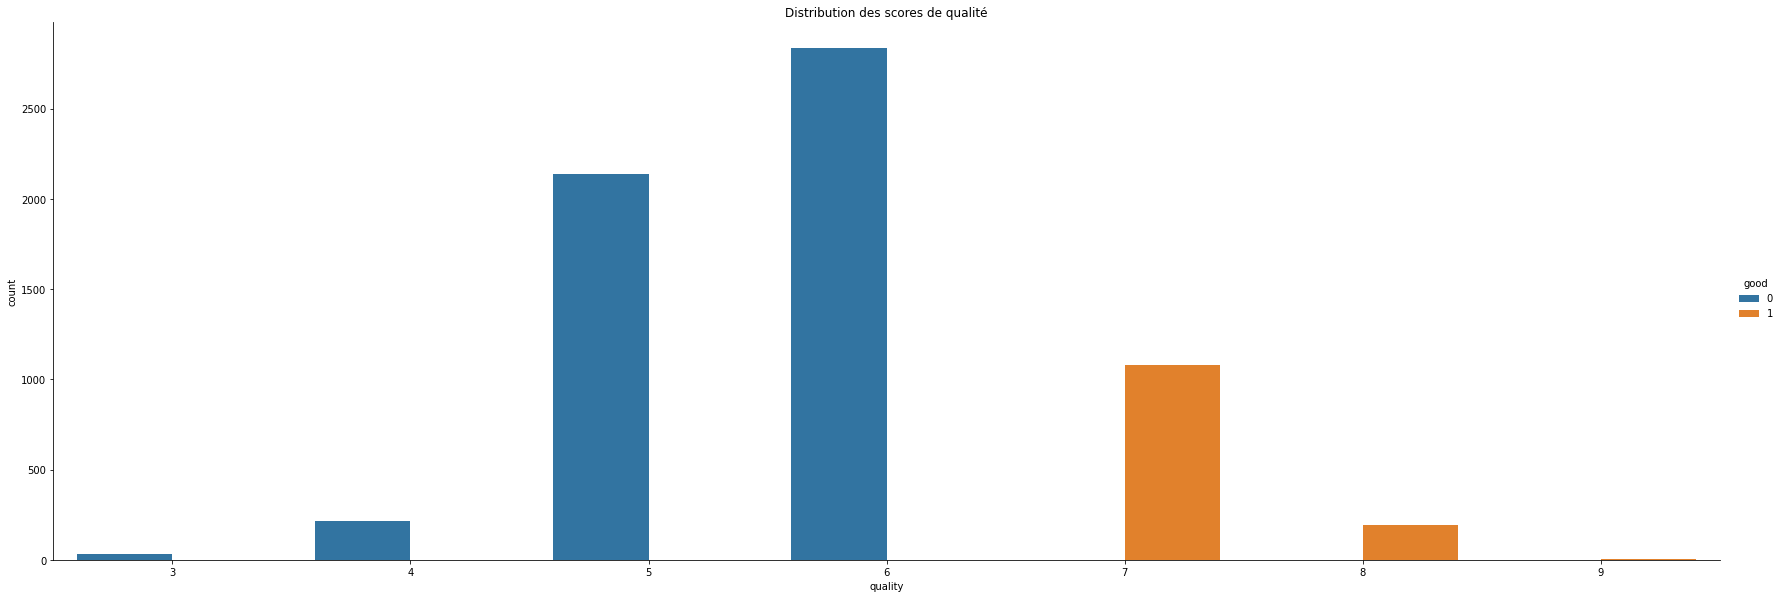

In [ ]:
#countplot of quality based on goodness feature
sns.catplot(x='quality',data=df,height=8,aspect=3,hue='good',kind='count')
plt.title('Distribution des scores de qualité');

<p align="justify">D'après le graphique ci-dessus, le vin est considéré comme de qualité seulement lorsqu'il obtient au moins un score de score de 7. Il est de mauvaise qualité lorsqu'il a un score inférieur à 7. </p>

##### **Analyse exploratoire des données**

### **3- METHODES NON SUPERVISEES**

###### **3.1- Implémentation de l'ACP**

In [ ]:
%%R
install.packages(c("FactoMineR", "factoextra"))
install.packages(c("readr", "dplyr"))

library(FactoMineR)
library(factoextra)
library(readr)
library(dplyr)
library(ggplot2)



<p align="justify">Toutes les variables ne participeront pas à la construction des composantes principales. Ainsi, nous allons implémenter l'ACP en séparant les variables variables actives c'est-à-dire celles qui participeront à l'ACP, des autres variables que nous désignons par variables supplémentaires.<p>

<p align="justify">Ici nous réalisons l'ACP. La fonction PCA du package FactoMineR normalise automatiquement les variables ce qui permet d'éviter tous les problèmes d'ordre et d'échelle.<p>

In [ ]:
%%R -i df

pca <- PCA(df, scale.unit = TRUE, ncp = 5, graph = TRUE, quanti.sup=12, quali.sup=13:14)
pca

R[write to console]: dev.new(): using pdf(file="Rplots1.pdf")



**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 6497 individuals, described by 15 variables
*The results are available in the following objects:

   name               
1  "$eig"             
2  "$var"             
3  "$var$coord"       
4  "$var$cor"         
5  "$var$cos2"        
6  "$var$contrib"     
7  "$ind"             
8  "$ind$coord"       
9  "$ind$cos2"        
10 "$ind$contrib"     
11 "$quanti.sup"      
12 "$quanti.sup$coord"
13 "$quanti.sup$cor"  
14 "$quali.sup"       
15 "$quali.sup$coord" 
16 "$quali.sup$v.test"
17 "$call"            
18 "$call$centre"     
19 "$call$ecart.type" 
20 "$call$row.w"      
21 "$call$col.w"      
   description                                              
1  "eigenvalues"                                            
2  "results for the variables"                              
3  "coord. for the variables"                               
4  "correlations variables - dimensions"                    
5  "co

**Les valeurs propres (eigenvalue)**
<p align="justify">Les valeurs mesurent la quantité de la variance associée à chaque composante principale. En effet, la première composante principale a une variance de 27.54%, la deuxième 22.67% et la troisième 14.15%. Toutes les trois (03) composantes cumulent près de 64 % de la variance totale des données. Les résultats sont affichés ci-dessous.</p>

In [ ]:
%%R
eig.val <- get_eigenvalue(pca)
eig.val

       eigenvalue variance.percent cumulative.variance.percent
Dim.1  3.03300130       25.2750108                    25.27501
Dim.2  2.52568890       21.0474075                    46.32242
Dim.3  1.57405355       13.1171130                    59.43953
Dim.4  1.00077392        8.3397827                    67.77931
Dim.5  0.93742242        7.8118535                    75.59117
Dim.6  0.70881026        5.9067522                    81.49792
Dim.7  0.59958450        4.9965375                    86.49446
Dim.8  0.52276778        4.3563982                    90.85086
Dim.9  0.50088479        4.1740399                    95.02490
Dim.10 0.33671703        2.8059752                    97.83087
Dim.11 0.22755879        1.8963232                    99.72719
Dim.12 0.03273675        0.2728063                   100.00000


**Selection du nombre de facteurs ou composantes principales**
Le principe consiste à retenir les composantes jusqu'à la dernière à partir de laquelle la décroissance de la courbe devient moins importante. Dans notre cas d'espace la dernière composante à partir de laquelle la décroissance devient moins importante est 3. Par conséquent, nous retenons les trois premières composantes principales. (cf. graphique ci-dessous.)

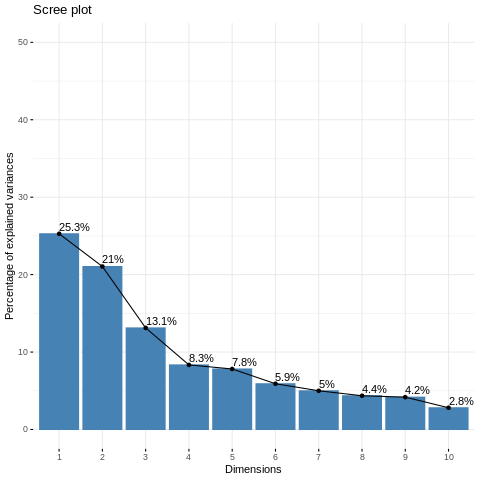

In [ ]:
%%R
fviz_eig(pca, addlabels = TRUE, ylim = c(0, 50))

<p align="justify">Ci-dessous, on peut avoir une idée de la composition de chaque composante principale. La formation de la première principale peut être exprimée comme suit:</p>

<p align="justify">PC1 = 0.42(fixed.acidity) + 0.66(volatile.acidity) - 0.27(acid.citric) - 0.60(residual.sugar) + 0.50(chlorides) - 0.75(free.sulfur.dioxide) - 0.85(total.sulfur.dioxide) + 0.08(density) + 0.38(PH) + 0.51(sulphates) + 0.19(alcohol).</p>

<p align="justify">On peut également retenir les attributs :<strong>free.sulfur.dioxide</strong>, <strong>total.sulfur.dioxide</strong>,<strong>volatile.acidity</strong> sont les attributs qui ont plus de poids sur la première composante principale; par conséquent contribuent plus à la formation de cette dernière.</p>

In [ ]:
%%R
var <-get_pca_var(pca)
var$coord

                           Dim.1       Dim.2      Dim.3       Dim.4       Dim.5
fixed.acidity         0.40837030  0.52514749 -0.5529057 -0.11434325 -0.12649798
volatile.acidity      0.65752412  0.20604222  0.3791642 -0.10446870 -0.18877785
citric.acid          -0.26742531  0.26812238 -0.7420638  0.13304366  0.22728652
residual.sugar       -0.61093625  0.50578357  0.1748373  0.02328734 -0.27336026
chlorides             0.49503922  0.50884617  0.0128791  0.12557741  0.24034081
free.sulfur.dioxide  -0.75212191  0.09976221  0.1538927  0.28495122  0.21838131
total.sulfur.dioxide -0.85094791  0.12213250  0.1215287  0.17378068  0.12229144
density               0.06086497  0.92302832  0.1860862  0.05766830 -0.16609924
pH                    0.38346535 -0.22950037  0.5655269  0.36650373  0.20335772
sulphates             0.50806654  0.30395816 -0.1057388  0.51228326  0.36771639
alcohol               0.20120791 -0.73970904 -0.3092517  0.07551891  0.05097646
quality_recode       -0.07005454  0.2274

**Cercle de corrélation et interprétation des variables**

<p align="justify">La première composante principale permet de distinguer des vins à goût de vinaigre désagréable en raison de leur forte teneur en acidicité notamment en acide acétique avec une volatilité d'acidité faible(les acides s'évaporent à peine). Ils contiennent également une quantité de sel (chloride) important. Face à ceux-ci, on distingue un groupe de vins doux en raison de la quantité importante du résidu de sucre après fermentation du vin. Ils contiennent également des formes libres de SO2 qui empêche la croissance microbienne et l'oxydation du vin.</p>

<p align="justify">La deuxième composante principale permet quant à elle de distinguer des vins à forte teneur en eau d'un coté et une catégorie de vins contenant une quatité élevé d'alcol, d'autre part.</p>

<p align="justify">Les illustrations sont mises en évidence sur le graphique ci-dessous.</p>


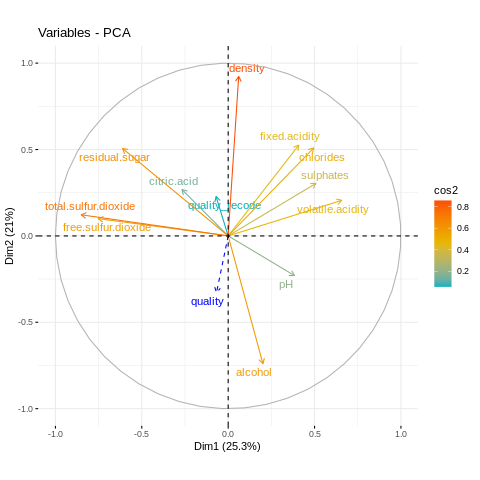

In [ ]:
%%R
# Color by cos2 values: quality on the factor map
fviz_pca_var(pca, col.var = "cos2",
             gradient.cols = c("#00AFBC", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

**Visualisons les variables qui contribuent le plus à la formation de chaque axe.**

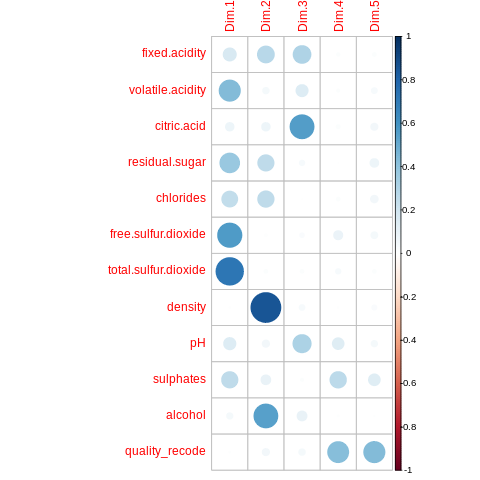

In [ ]:
%%R
library("corrplot")
corrplot(var$cos2, is.corr=TRUE)

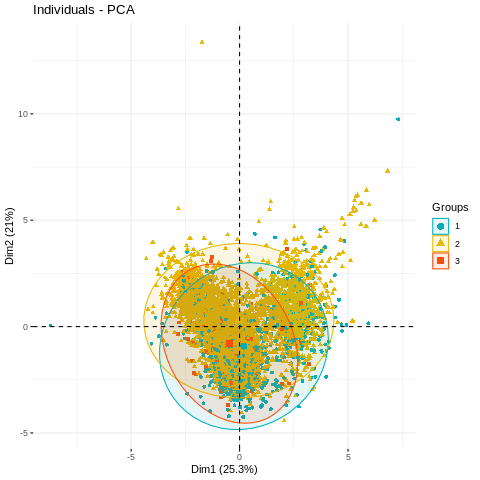

In [ ]:
%%R

fviz_pca_ind(pca,
geom.ind = "point", # show points only (nbut not "text")
col.ind = as.factor(df$quality_recode), # color by groups
palette = c("#00AFBB", "#E7B800", "#FC4E07"),
#palette = c("#00AFBB", "#E7B800", "#FC4E07","#00FFFF", "#000000", "#00FF00", "#FFFF00"),
addEllipses = TRUE, # Concentration ellipses
legend.title = "Groups"
)


###### **CONCLUSION SUR L'ACP**

Dans cette première partie, Nous avons implémenté l'Analyse en Composante Principale (ACP) et retenu trois (03) principaux facteurs qui ne captent que 64% environ de toutes les informations du jeu de données initiale. On peut dire que ceci est insuffisant. L'évidence en est qu'en représentant les données sur un graphique (graphique ci-dessus), il est difficile de distinguer les catégories d'individus.  Ceci étant, il serait intéressant d'explorer d'autres algorithmes plus sophistiqués.


#### **3.2- K-MEANS**

<p align="justify">L'algorithme de Kmeans est un algorithme itératif qui tente de partitionner l'ensemble de données en K sous-groupes distincts (clusters) pré-définis et sans chevauchement, où chaque point de données appartient à un seul groupe. Il tente de rendre les points de données intra-groupe aussi similaires que possible tout en gardant les groupes aussi différents (loin) que possible. Il attribue les points de données à un groupe de telle sorte que la somme des carrés des distances entre les points de données et le centroïde du groupe (moyenne arithmétique de tous les points de données qui appartiennent à ce groupe) soit au minimum. Moins il y a de variation au sein des groupes, plus les points de données sont homogènes (similaires) au sein d'une même groupe.</p>
<p align="justify">L'algorithme kmeans fonctionne de la manière suivante :</p>
<ol>Spécifier le nombre de grappes K.

<li>Initialiser les centroïdes en mélangeant d'abord l'ensemble de données, puis en sélectionnant aléatoirement K points de données pour les centroïdes sans remplacement;</li>

<li>Continuez à répéter l'opération jusqu'à ce que les centroïdes ne changent plus, c'est-à-dire que l'attribution des points de données aux groupes ne change plus.</li>

<li> Calculez la somme des carrés des distances entre les points de données et tous les centroïdes.
Assignez chaque point de données à la grappe la plus proche (centroïde).</li>

<li>Calculer les centroïdes des grappes en prenant la moyenne de tous les points de données qui appartiennent à chaque grappe.</li></ol>

Ci-après l'implémentation de l'algorithme sur les données de la qualité du vin.

In [ ]:
# Rappelons à nouveau la base données
df = pd.read_csv("/content/winequality.csv")
df.head()

# Selectionnons les variables pour le K-means

dfKmeans = df.loc[:,"fixed acidity":"alcohol"]

In [ ]:
%%R

# Installation des packages (bibliothèques)
install.packages(c("tidyverse", "corrplot", "gridExtra","GGally","knitr", "ggcorrplot","cluster","data.table","mclust","fpc", "GGally"))
library(cluster)        # For silhoutte()
library(factoextra)     # get_clust_tendency() assesses hopkins stat
library(data.table)
library(GGally)
library(ggcorrplot)
library(mclust)
library(fpc)
# Chargement des packages (bibliothèques)
library(tidyverse)
library(corrplot)
library(gridExtra)
library(GGally)
library(knitr)

In [ ]:
%%R -i dfKmeans
kable(head(dfKmeans))



|   | fixed.acidity| volatile.acidity| citric.acid| residual.sugar| chlorides| free.sulfur.dioxide| total.sulfur.dioxide| density|   pH| sulphates| alcohol|
|:--|-------------:|----------------:|-----------:|--------------:|---------:|-------------------:|--------------------:|-------:|----:|---------:|-------:|
|0  |           7.4|             0.70|        0.00|            1.9|     0.076|                  11|                   34|  0.9978| 3.51|      0.56|     9.4|
|1  |           7.8|             0.88|        0.00|            2.6|     0.098|                  25|                   67|  0.9968| 3.20|      0.68|     9.8|
|2  |           7.8|             0.76|        0.04|            2.3|     0.092|                  15|                   54|  0.9970| 3.26|      0.65|     9.8|
|3  |          11.2|             0.28|        0.56|            1.9|     0.075|                  17|                   60|  0.9980| 3.16|      0.58|     9.8|
|4  |           7.4|             0.70|        0.00|     

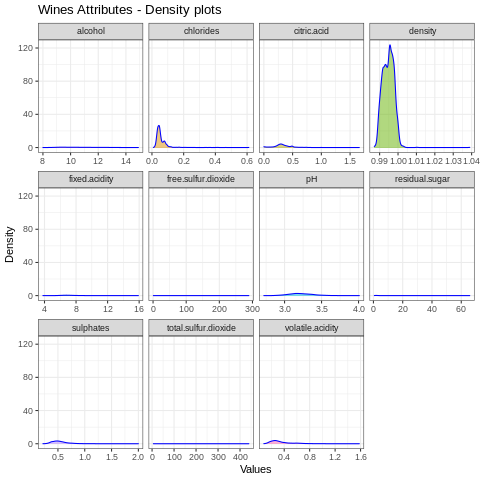

In [ ]:
%%R 
# Histogram for each Attribute
dfKmeans %>%
  gather(Attributes, value, 1:11) %>%
  ggplot(aes(x=value, fill=Attributes)) +
  geom_density(colour="blue", alpha=0.5, show.legend=FALSE) +
  facet_wrap(~Attributes, scales="free_x") +
  labs(x="Values", y="Density",
       title="Wines Attributes - Density plots") +
  theme_bw()

##### Normalisation des données.
Ici les données sont normalisées afin d'éliminer les effets de taille et d'echelle évéentuels parmis les vaiables.

In [ ]:
%%R
# Normalization 
winesNorm <- as.data.frame(scale(dfKmeans))

kable(head(winesNorm))



|   | fixed.acidity| volatile.acidity| citric.acid| residual.sugar| chlorides| free.sulfur.dioxide| total.sulfur.dioxide|   density|         pH| sulphates|    alcohol|
|:--|-------------:|----------------:|-----------:|--------------:|---------:|-------------------:|--------------------:|---------:|----------:|---------:|----------:|
|0  |     0.1424623|        2.1886645|   -2.192664|     -0.7447208| 0.5699140|          -1.1000552|           -1.4462472| 1.0349132|  1.8129500| 0.1930819| -0.9153937|
|1  |     0.4510010|        3.2819823|   -2.192664|     -0.5975941| 1.1978825|          -0.3112961|           -0.8624022| 0.7014323| -0.1150642| 0.9995017| -0.5800235|
|2  |     0.4510010|        2.5531038|   -1.917405|     -0.6606484| 1.0266184|          -0.8746955|           -1.0924018| 0.7681285|  0.2580999| 0.7978967| -0.5800235|
|3  |     3.0735801|       -0.3624106|    1.660957|     -0.7447208| 0.5413699|          -0.7620156|           -0.9862481| 1.1016093| -0.3638402| 0.3274852| -0

**Implémentation de l'algorithme des K-means**

In [ ]:
%%R
# Execution of k-means with k=3
set.seed(1234)

wines_k3 <- kmeans(winesNorm, centers=3)

# Mean values of each cluster
aggregate(dfKmeans, by=list(wines_k3$cluster), mean)

  Group.1 fixed.acidity volatile.acidity citric.acid residual.sugar  chlorides
1       1      6.762396        0.2733200   0.3178431       3.367464 0.04051113
2       2      8.354551        0.5342028   0.2718770       2.573258 0.08903892
3       3      6.976781        0.2814802   0.3591926      11.151873 0.05293668
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1            28.90994            117.70954 0.9921423 3.212134 0.4891093
2            15.69586             47.65097 0.9968172 3.304689 0.6565788
3            45.55646            169.86623 0.9969699 3.156158 0.4928707
    alcohol
1 11.170487
2 10.338439
3  9.543061


**Représentation des 3 classes (groupes) selon les attributs décrivant la teneur du vin.**

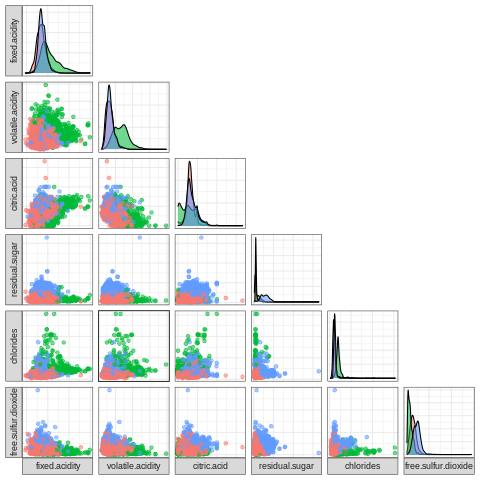

In [ ]:
%%R
# Clustering 
ggpairs(cbind(dfKmeans, Cluster=as.factor(wines_k3$cluster)),
        columns=1:6, aes(colour=Cluster, alpha=0.5),
        lower=list(continuous="points"),
        upper=list(continuous="blank"),
        axisLabels="none", switch="both") +
        theme_bw()

##### Réprésentation globale des 3 catégories.

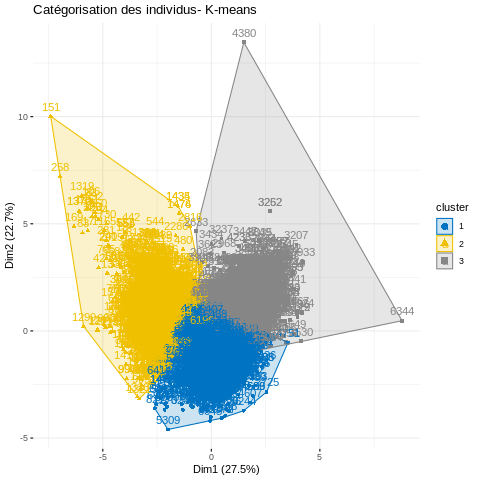

In [ ]:
%%R
fviz_cluster(wines_k3, data = dfKmeans,
             ellipse.type = "convex",
             palette = "jco",
             main="Catégorisation des individus- K-means",
             ggtheme = theme_minimal())

##### **Conclusion sur le K-means**

<p align="justify">Dans cette partie, nous avons implémenté le k-means. Le classement nous a permis d'avoir 3 classes distinctes.Nous pouvons retenir que la classe 1 regroupe des individus ayant plus de penchant pour les vins a forte teneur en alcol (représentés en blue). La classe 2 (en jaune) regroupe ceux qui aiment plutôt le vin doux sucré et enfin les individus de la classe 3 (en gris) qui aiment plutôt le vin à saveur de vinaigre. Le moins qu'on puisse dire est que la catégorisation est meilleure avec le K-means comparativement au PCA</p>

### **3.C- CLASSIFICATION HIERARCHIQUE**

<p align="justify">Le regroupement hiérarchique est une approche alternative au regroupement k-means pour identifier des groupes dans un ensemble de données. Contrairement à k-means, la classification hiérarchique crée une hiérarchie de groupes et ne nécessite donc pas de spécifier au préalable le nombre de groupes. En outre, la classification hiérarchique présente un avantage supplémentaire par rapport à la classification k-means, car ses résultats peuvent être facilement visualisés à l'aide d'une représentation arborescente attrayante appelée dendrogramme.</p>


In [ ]:
# Installation et importation des packages
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [ ]:
# Importation des données

path = '/content/drive/MyDrive/Colab Notebooks/MSI_DATA_SCIENCE_PROJECT'

dfh = pd.read_csv("/content/winequality.csv")

# Selectionons les variables à utilisées (la méthode ne s'applique que sur les donnérs numérique)

dfh= dfh.iloc[:,0:12].values

#dfh= dfh.loc[:,"fixed acidity":"alcohol"].astype('int')
#dfh.head()

**Représentation du dendogramme**

Le dendogramme a représenté deux classes par défaut.

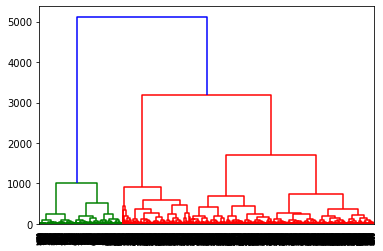

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dfh, method="ward"))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(affinity="euclidean", linkage='ward', n_clusters=3)
labels = agglomerative.fit_predict(dfh)
np.unique(labels)#.astype("int64")

plt.scatter(dfh[labels== 0, 0], dfh[labels == 0, 1], s=10, c="blue")
plt.scatter(dfh[labels==1, 0], dfh[labels == 1, 1], s=30, c="red")
plt.scatter(dfh[labels==2, 0], dfh[labels == 2, 1], s=30, c="green")
plt.title("Classification hiérarchique agglomérative")
plt.xlabel("")
plt.ylabel("")
plt.show()

array([0, 1, 2])

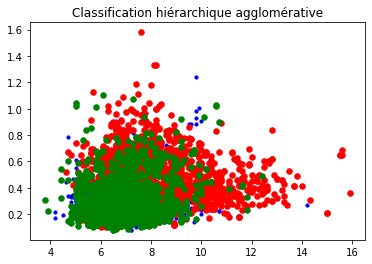

In [ ]:
plt.scatter(dfh[labels== 0, 0], dfh[labels == 0, 1], s=10, c="blue")
plt.scatter(dfh[labels==1, 0], dfh[labels == 1, 1], s=30, c="red")
plt.scatter(dfh[labels==2, 0], dfh[labels == 2, 1], s=30, c="green")
plt.title("Classification hiérarchique agglomérative")
plt.xlabel("")
plt.ylabel("")
plt.show()

##### **Conclusion sur la classification hiérarchique**
<p align="justify">Nous avons réalisé dans cette partie le clustering avec la méthode de la classification hiérarchique agglomérative. La réprésentation du dendogramme a permis d'obtenir par défaut deux clusters. En spécifiant le nombre de classe à 3, on peut voir que l'algorithme n'a pas su catégoriser proprement les observations en blue, qui se sont éparpillées tout autour des deux autres groupes vert et rouge.<p>

### **3.d- HDBSCAN CLUSTERING**

> Indented block



In [ ]:
# Importation des Packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [ ]:
# Rappel du jeu de données
df_hbd = dfh

array([-1,  0,  1,  2,  3])

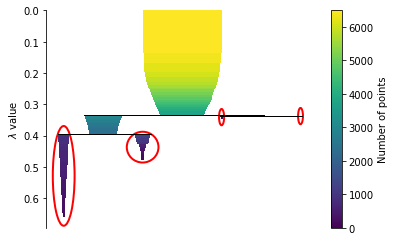

In [ ]:
#!pip install hdbscan
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=150, min_samples=3)
labels = hdbscan.fit_predict(df_hbd)
hdbscan.condensed_tree_.plot(select_clusters = True)
np.unique(labels)

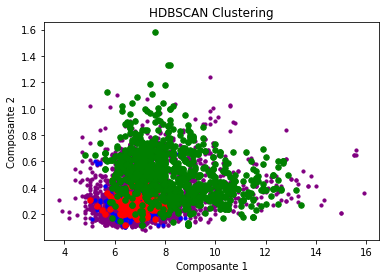

In [ ]:
plt.scatter(df_hbd[labels== -1, 0], df_hbd[labels == -1, 1], s=10, c="purple")

plt.scatter(df_hbd[labels== 0, 0], df_hbd[labels == 0, 1], s=10, c="blue")
plt.scatter(df_hbd[labels==1, 0], df_hbd[labels == 1, 1], s=30, c="red")
plt.scatter(df_hbd[labels==2, 0], df_hbd[labels == 2, 1], s=30, c="green")
plt.title("HDBSCAN Clustering")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()

##### **Conclusion sur le clustering avec HDBSCAN**

<p align = "justify">Nous venons de réaliser la clustering avec le HDBSCAN. Bien que cet algorithme prétend améliorer les limites de la classification hiérarchique et celles du DBSCAN, sa performance sur ce jeux de données n'est très appréciable.<p>

### **4- Comparaison des classes obtenues selon les différents algorithmes**

En somme, nous avons implémenté quatre algorithmes sur les données de la qualité du vin. Il s'agit de :

<ol>
<li>Analyse de la Composante Principale (ACP)</li>
<li>K-means</li>
<li>la classification hiérarchique</li> <li>classification HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)</li>
</ol>

Selon la classification obtenue au niveau de chaque algorithme, on remarque le K-means est plus performant sur ce jeu de données particulier avec visibilité des classes qui sont plus distinctes et claires. On ne dira pas forcément que les autres algorithmes ne sont pas performants mais le moins qu'on puisse dire est que selon les données, certains algorithmes sont plus performants que d'autres.


---



<h1> <strong>4. METHODES SUPERVISEES</strong></h1>

### **Problème de regression**

In [61]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas.util.testing as tm

In [110]:
# Appel de la base de données à nouveau
dfreg=df
dfreg.head()

#print(dfreg.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [114]:
# dissocions les attibuts explicatifs de l'attribut cible
X = dfreg.iloc[:,np.r_[0:11,13]]
col = pd.get_dummies(X.iloc[:,11], prefix='color').iloc[:,1:]
X = pd.concat([X,col], axis= 1)
X.drop(["color"], axis = 1, inplace=True)
#X = X.values
Y = dfreg.iloc[:,11]

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [115]:
#Partageons les données entre apprentissage et test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)
print ("Train dataset sample size: %i" % len(X_train))
print ("Test dataset sample size: %i" % len(X_test))

Train dataset sample size: 4872
Test dataset sample size: 1625


<p align="justify">Nous avons scindé le jeu de données en apprentissage et test ce qui amène à avoir : </p>

*   4872 observations pour l'apprentissage 

*   1625 observation pour le test

In [116]:
# Ajout de la constante
Xc= sm.add_constant(X)

# linear regression model

linear_regression = sm.OLS(Y, Xc)

#linear_regression = sm.OLS(Y.astype(float), Xc.astype(float))

fitted_model = linear_regression.fit()

# Summary
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:56:32   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  104.7518 

**Calacul du score (précision sur le l'échantillon test)**

In [117]:

y_predict = fitted_model.predict(X_test)

ValueError: ignored

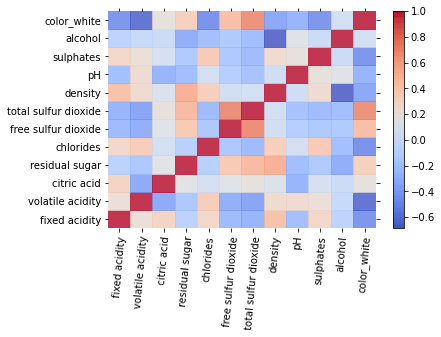

In [99]:
def visualize_correlation_matrix(data, hurdle = 0.0):
  R = np.corrcoef(data, rowvar=0)
  R[np.where(np.abs(R)<hurdle)]==0.0
  heatmap= plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
  heatmap.axes.set_frame_on(False)
  heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
  heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
  heatmap.axes.set_xticklabels(X, minor=False)
  plt.xticks(rotation=85)
  heatmap.axes.set_yticklabels(X, minor=False)
  plt.tick_params(axis='both', which="both", bottom='off', top='off', left='off',right='off')
  plt.colorbar()
  plt.show()

visualize_correlation_matrix(X, hurdle=0.5)

In [ ]:
correlation_matrix = X.corr()

print(correlation_matrix)

                      fixed acidity  volatile acidity  ...  sulphates   alcohol
fixed acidity              1.000000          0.219008  ...   0.299568 -0.095452
volatile acidity           0.219008          1.000000  ...   0.225984 -0.037640
citric acid                0.324436         -0.377981  ...   0.056197 -0.010493
residual sugar            -0.111981         -0.196011  ...  -0.185927 -0.359415
chlorides                  0.298195          0.377124  ...   0.395593 -0.256916
free sulfur dioxide       -0.282735         -0.352557  ...  -0.188457 -0.179838
total sulfur dioxide      -0.329054         -0.414476  ...  -0.275727 -0.265740
density                    0.458910          0.271296  ...   0.259478 -0.686745
pH                        -0.252700          0.261454  ...   0.192123  0.121248
sulphates                  0.299568          0.225984  ...   1.000000 -0.003029
alcohol                   -0.095452         -0.037640  ...  -0.003029  1.000000

[11 rows x 11 columns]


In [ ]:
corr = np.corrcoef(X, rowvar=0)

eigenvalues, eigenvectors  = np.linalg.eig(corr)

print("Les valeurs propres:", eigenvalues,"\n")

print("Les vecteurs propres:",eigenvectors[:,10],"\n")

Les valeurs propres: [3.02986865 2.49382603 1.55634695 0.0328308  0.97055208 0.22769576
 0.33702405 0.71987492 0.60731171 0.50151029 0.52315876] 

Les vecteurs propres: [-0.28307944 -0.38915976 -0.38128504  0.21797554 -0.04606816 -0.29936325
 -0.13891032 -0.04675897 -0.41890702  0.52534311 -0.10410343] 



In [ ]:
varList = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [ ]:
print(X.columns[3], X.columns[5], X.columns[6])

residual sugar free sulfur dioxide total sulfur dioxide


**Elimination des variables moins utiles pour le modèle**

In [ ]:
 from sklearn.linear_model import LinearRegression
 from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
 train_test_split(X, Y, test_size=0.25, random_state=1)

NameError: ignored